In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## 【課題1】練習のために特徴量とカテゴリを選択
選び方は合計18通りありますが、以下の組み合わせで練習することにします。irisデータセットをWeek3同様に取得した後、データフレームからこれらを抜き出してください。

* virgicolorとvirginica
* sepal_lengthとpetal_length

《実際の問題では？》

実際の問題を解く上でも結果の可視化は有効です。しかし、そのために学習や推定に使う特徴量を2つに絞るのは望ましくありません。そのため学習や推定は多次元で行い、可視化をする際にだけ主成分分析などの特徴抽出手法を適用するといったことが行われます。また、Week3で利用した散布図行列を使い可視化することも可能です。

In [83]:
#データセット準備
from sklearn.datasets import load_iris
iris_dataset = load_iris()

df = pd.DataFrame(iris_dataset.data, columns = iris_dataset.feature_names)
y = pd.DataFrame(iris_dataset.target, columns=["target"])

#列名の「cm」をカット
cols = {x:x.replace(" (cm)", "") for x in df.columns}
df = df.rename(columns=cols)

#説明変数と目的変数のデータフレームを結合
df = pd.concat([df, y], axis=1)

#練習用に特徴量とカテゴリを選択
df = df[["sepal length", "petal length", "target"]][df["target"] > 0]
df.head()

,sepal length,petal length,target
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1


## 【問題2】データの分析
まずはデータの分析を行いますが、これはWeek3の課題1で行いました。その際出力した散布図行列を見ることで、先ほどの18通りそれぞれの散布図も確認できます。sepal_lengthとpetal_lengthを使い、virgicolorとvirginicaを分類するのは少し難しそうな状況であることが分かるはずです。

ここでは復習を兼ねて、抜き出したデータの散布図と箱ひげ図（boxplot）、バイオリン図（violinplot）を表示してください。

《実際の問題では？》

このデータ分析の結果を元に前処理として特徴量エンジニアリングを行っていきます。

今回はsepal_lengthとpetal_lengthを抜き出しましたが、分析した上で、問題を少々難しくするための前処理をしたと言えます。

C:\Users\syous\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\syous\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


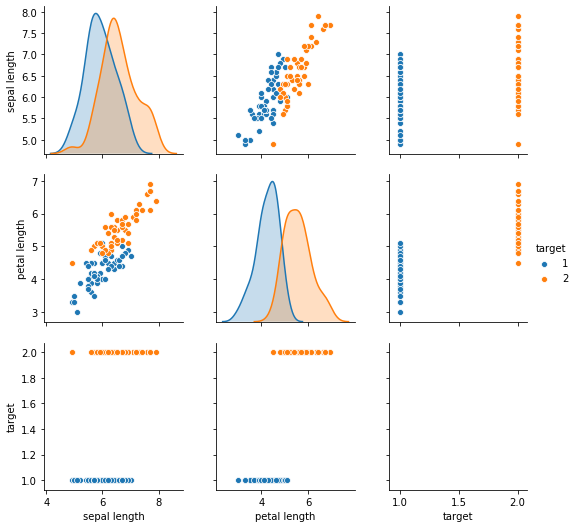

In [84]:
#散布図行列を作成
sns.pairplot(df, hue="target")
plt.show()

In [ ]:
#箱ひげ図
label = ["virgicolor", "virginica"]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

sns.boxplot(x="target", y="sepal length", data=df, ax=ax1)
ax1.set_xticklabels(label)
sns.boxplot(x="target", y="petal length", data=df, ax=ax2)
ax2.set_xticklabels(label)
plt.show()

In [ ]:
#バイオリン図
label = ["virgicolor", "virginica"]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

sns.violinplot(x="target", y="sepal length", data=df, ax=ax1)
ax1.set_xticklabels(label)
sns.violinplot(x="target", y="petal length", data=df, ax=ax2)
ax2.set_xticklabels(label)
plt.show()

## 【問題3】前処理・訓練データと検証データの分割
前処理の一貫として、訓練データと検証データの分割を行います。今回は訓練データ75%、検証データ25%として分割してください。

scikit-learnのtrain_test_splitが利用できます。公式ドキュメントのExamplesを参考に動かしてください。

[sklearn.model_selection.train_test_split — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

《注意点》

データの分析まではPandasのDataFrameを使用してきました。しかし、scikit-learnはNumPyのndarrayを想定して作られています。そのため、この段階でndarrayへの変換を行いましょう。特徴量（説明変数）をX、正解（目的変数）をyというndarrayに格納します。

《分割する理由》

分類問題の目的は未知のデータを正しく分類することです。その目的が達成できているかを確認するため、実際には答えの分かっているデータの一部を学習には使わず残しておきます。この学習に使用していないデータで推定を行い、そこから求めた指標値によって検証します。学習に使うデータを訓練データ、検証に使うデータが検証データで、一般的に7対3から8対2程度の割合にします。

In [182]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
                                    df[["sepal length", "petal length"]], df["target"], test_size=0.25, random_state=0)

x_train, x_test, y_train, y_test = map(np.array, (x_train, x_test, y_train, y_test))

## 【問題4】前処理・標準化
分類精度をあげるための加工を行います。手法ごとに適切な方法は異なりますが、ここでは一例として 標準化 を行うことにします。

標準化を行うライブラリもscikit-learnに用意されています。これを使って標準化してください。

[sklearn.model_selection.train_test_split — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

《注意点》

標準化は訓練用のデータでfitを行い、訓練用、検証用双方のデータにtransformを行います。検証データは学習の段階には存在しない未知のデータの代わりなので、標準化のための平均や標準偏差の計算に使ってはいけません。

《実際の問題での前処理は？》

アヤメのデータセットのように綺麗で扱いやすい状況で提供されることはまずありません。分析を行いながら、様々な加工が必要になってきます。例えばWeek3の課題2で行った欠損値の確認の後、場合により欠損値の補間も行います。外れ値の確認や、複数のデータセットの整理などもあります。

In [183]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)

x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

## 【問題5】学習と推定
最近傍法（k-nearest neighbors, k-nn）で学習を行います。scikit-learnの公式ドキュメントのExamplesを参考に、k-nnの学習を行ってください。ここで入力するのは訓練データです。

[sklearn.neighbors.KNeighborsClassifier — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)

学習が終わった後、検証データをpredictメソッドに入力し、推定を行ってください。

パラメータが複数ありますが、今はそれらの理解を重視しません。最も基本的な要素として、n_neighborsの数があるため、これは複数試してみましょう。デフォルトの5、および1と3を最低限行ってください。5の場合を5-nn、3の場合を3-nnのように呼びます。

In [184]:
from sklearn.neighbors import KNeighborsClassifier

# k=5
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(x_train, y_train)
pred_5 = knn_5.predict(x_test)

# k=3
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3.fit(x_train, y_train)
pred_3 = knn_3.predict(x_test)

# k=1
knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_1.fit(x_train, y_train)
pred_1 = knn_1.predict(x_test)

## 【問題6】評価
検証データの特徴量を入力して得られた推定値と、検証データの正解値の近さを計算し、学習したモデルを評価します。

2値分類を評価するための指標値には Accuracy（正解率）、Precision（適合率）、Recall（再現率）、F値 があります。

それぞれの意味を理解するには、 混同行列（confusion matrix） を見ることになります。

* scikit-learnを使い4種類の指標を計算する
* 混同行列をscikit-learnを使い表示する
* 4種類の指標値の意味について簡単に調査して文章でまとめる

### scikit-learnを使い4種類の指標を計算する

In [185]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def performance_evaluation(y_true, y_pred, r=False):
    print("Accuracy：{:.3f}".format(accuracy_score(y_true, y_pred)))
    print("Precion：{:.3f}".format(precision_score(y_true, y_pred)))    
    print("Recall：{:.3f}".format(recall_score(y_true, y_pred)))    
    print("F：{:.3f}".format(f1_score(y_true, y_pred)))    
    
print("【K=5】" + "-"*50)
performance_evaluation(y_test, pred_5)
print()
print("【K=3】" + "-"*50)
performance_evaluation(y_test, pred_3)
print()
print("【K=1】" +"-"*50)
performance_evaluation(y_test, pred_1)

【K=5】--------------------------------------------------
Accuracy：0.880
Precion：1.000
Recall：0.769
F：0.870

【K=3】--------------------------------------------------
Accuracy：0.920
Precion：1.000
Recall：0.846
F：0.917

【K=1】--------------------------------------------------
Accuracy：0.840
Precion：0.909
Recall：0.769
F：0.833


### 混同行列をscikit-learnを使い表示する

In [186]:
from sklearn.metrics import confusion_matrix
print("【K=5】" + "-"*50)
print(confusion_matrix(y_test, pred_5))
print()
print("【K=3】" + "-"*50)
print(confusion_matrix(y_test, pred_3))
print()
print("【K=1】" + "-"*50)
print(confusion_matrix(y_test, pred_1))


【K=5】--------------------------------------------------
[[10  3]
 [ 0 12]]

【K=3】--------------------------------------------------
[[11  2]
 [ 0 12]]

【K=1】--------------------------------------------------
[[10  3]
 [ 1 11]]


### 4種類の指標値の意味について簡単に調査して文章でまとめる


![https://qiita.com/TsutomuNakamura/items/a1a6a02cb9bb0dcbb37f](https://qiita-image-store.s3.ap-northeast-1.amazonaws.com/0/70152/29cc37e7-ff2e-d781-d4a4-e328fd7526a1.png)

**正解率：** $Accuracy = \cfrac{TP + TN}{TP + FP + FN + FP}$　

全体の中でどれだけ正しく分類ができたかという指標

ぱっと見でこの数値が高いと良い性能を示すように思えるが、データの偏りがある場合は注意が必要

真陽性のサンプルが極端に少ない場合に、逆に真陰性の数が多いと正解率は高くなるが、本当に予測したいものを正確に予測できているとはいえない


**適合率：** $Precicion = \cfrac{TP}{TP+FP}$ 　

陽性と判断されたデータの中で真に陽性だったデータの数。

この値が高いほど性能が良く、間違った分類が少ないことを意味する

**再現率：** $Recall = \cfrac{TP}{TP+FN}$ 　

取りこぼし無く陽性なデータを正しく陽性と推測できているかどうか

この値が高いほど性能が良く、間違った陽性の判断が少ないということ。本来陽性と推測すべきデータの内、どれほど回収できたか

**F値：** $F = 2 × \cfrac{適合率 × 再現率}{適合率 ＋ 再現率}$

適合率と再現率の調和平均をとったもの

つまり、再現率と適合率を一方に偏らせずに均等に評価したい場合の指標として使われる

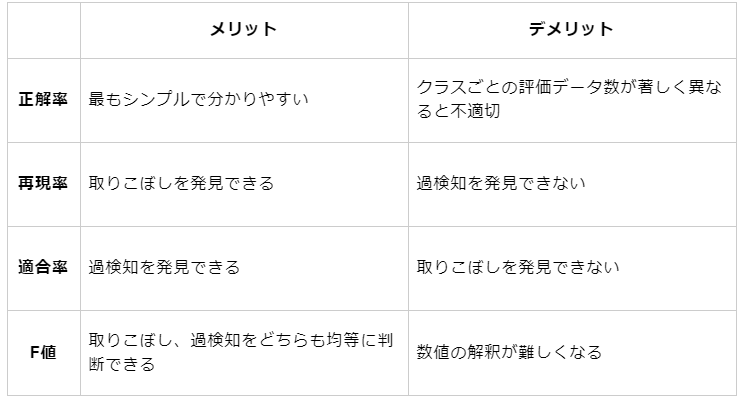

## 【問題7】可視化
評価の一貫として可視化を行います。今回の場合2次元の特徴量で分類を行いましたから、散布図で可視化が可能です。以下にどう分割するかという 決定領域 を描く関数を用意しました。これを利用して可視化を行ってください。Xとyには訓練データまたは検証データを与えます。

In [187]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

訓練データの散布図

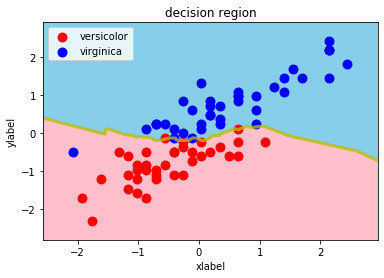

In [164]:
decision_region(x_train, y_train, knn_3)

テストデータの散布図

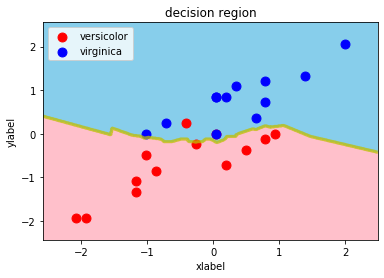

In [165]:
decision_region(x_test, y_test, knn_3)

## 【問題8】他の手法の学習
以下の全ての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と決定領域を利用して結果を簡単に考察してください。どの手法がどの指標値で良かったかや、どういった決定領域になっていたかを述べてください。

* 最近傍法
* ロジスティック回帰
* SVM
* 決定木
* ランダムフォレスト

公式ドキュメントへのリンクは以下です。それぞれ調整すべき引数（ハイパーパラメータ）がありますが、この課題では扱いません。

まずはデフォルトの値で実行してください。

### 最近傍法

1～7で行ってきた通り

### ロジスティック回帰

Accuracy：0.920
Precion：1.000
Recall：0.846
F：0.917


C:\Users\syous\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


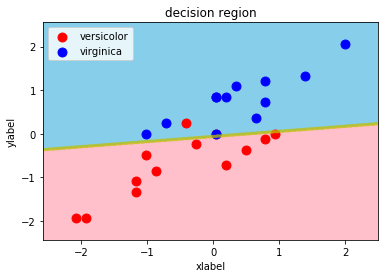

In [188]:
from sklearn.linear_model import LogisticRegression

#訓練データでの学習と予測
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)

#モデルの評価
performance_evaluation(y_test, lr_pred)

#決定領域の可視化
decision_region(x_test, y_test, lr)

### SVM

Accuracy：0.920
Precion：1.000
Recall：0.846
F：0.917


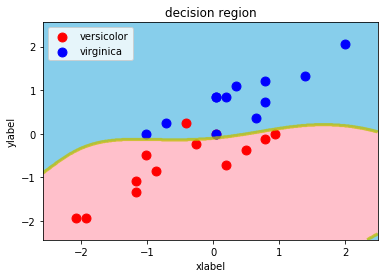

In [189]:
from sklearn.svm import SVC

#訓練データでの学習と予測
svc = SVC()
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)

#モデルの評価
performance_evaluation(y_test, svc_pred)

#決定領域の可視化
decision_region(x_test, y_test, svc)

### 決定木

Accuracy：0.880
Precion：1.000
Recall：0.769
F：0.870


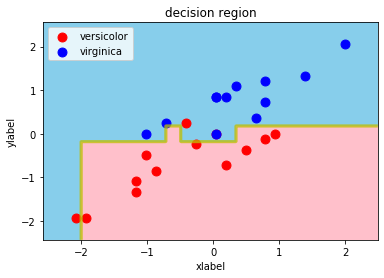

In [190]:
from sklearn.tree import DecisionTreeClassifier

#訓練データでの学習と予測
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
tree_pred = tree.predict(x_test)

#モデルの評価
performance_evaluation(y_test, tree_pred)

#決定領域の可視化
decision_region(x_test, y_test, tree)

### ランダムフォレスト

C:\Users\syous\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy：0.880
Precion：1.000
Recall：0.769
F：0.870


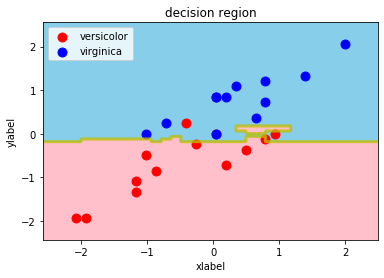

In [191]:
from sklearn.ensemble import RandomForestClassifier

#訓練データでの学習と予測
random_cf = RandomForestClassifier()
random_cf.fit(x_train, y_train)
random_cf_pred = tree.predict(x_test)

#モデルの評価
performance_evaluation(y_test, random_cf_pred)

#決定領域の可視化
decision_region(x_test, y_test, random_cf)

**考察**

In [192]:
#性能評価指標をdf化する関数
def eval_df(y_true, y_pred, idx):
    ac = accuracy_score(y_true, y_pred)
    pr = precision_score(y_true, y_pred)
    rc = recall_score(y_true , y_pred)
    f = f1_score(y_true , y_pred)
    
    df = pd.DataFrame(data={"accuracy": ac, "precision": pr, "recall": rc, "F": f}, index=[idx])
    return df

In [193]:
#評価指標を並べたｄｆを作成
knn_3_eval = eval_df(y_test, pred_3, "KNeighbors")
lr_eval = eval_df(y_test, lr_pred, "LogisticRegression")
svc_eval = eval_df(y_test, svc_pred, "SVM")
tree_eval = eval_df(y_test, tree_pred, "DecisionTree")
random_cf_eval = eval_df(y_test, random_cf_pred, "RandomForest")

df_eval = pd.concat([knn_3_eval, lr_eval, svc_eval, tree_eval, random_cf_eval])
display(df_eval)

,accuracy,precision,recall,F
KNeighbors,0.92,1.0,0.846154,0.916667
LogisticRegression,0.92,1.0,0.846154,0.916667
SVM,0.92,1.0,0.846154,0.916667
DecisionTree,0.88,1.0,0.769231,0.869565
RandomForest,0.88,1.0,0.769231,0.869565


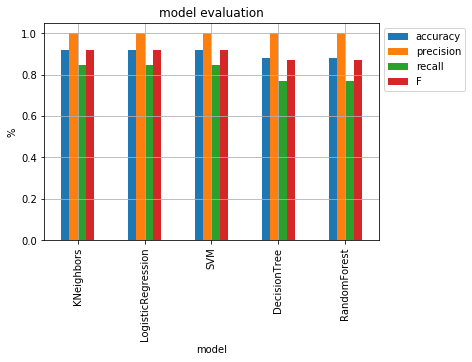

In [194]:
df_eval.plot.bar()
plt.xlabel("model")
plt.ylabel("%")
plt.title("model evaluation")
plt.grid()
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

**考察**

* 最近傍法：正解率が高く、適合率は100%を示した。決定領域はジグザグな非線形な境界で分けられる
* ロジスティック回帰：正解率が高く、適合率は100%を示した。決定領域は線形（直線）の境界で分けられる
* ＳＶＭ：正解率が高く、適合率は100%を示した。決定領域は曲線を描き非線形な境界で分けられる
* 決定木：上記３つのアルゴリズムと比較して、全ての指標値でやや劣る。決定領域は水平・垂直ないくつかの直線で分けられる
* ランダムフォレスト：決定木と同じく、上記３つのアルゴリズムと比較して、全ての指標値でやや劣る。決定領域は水平・垂直ないくつかの直線で分けられる

## 【問題9】（アドバンス課題）標準化の有無の比較
前処理として標準化を行いましたが、これを行わなかった場合どのような結果が得られるでしょうか。  
各手法に対しての指標値の表と決定領域の図を作成し比較および考察を行ってください。  
考察には標準化が機械学習の前処理としてどのような意味があるかを絡めてください。

In [195]:
#訓練データと検証データに分け、標準化を行わない
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
                                    df[["sepal length", "petal length"]], df["target"], test_size=0.25, random_state=0)

x_train, x_test, y_train, y_test = map(np.array, (x_train, x_test, y_train, y_test))

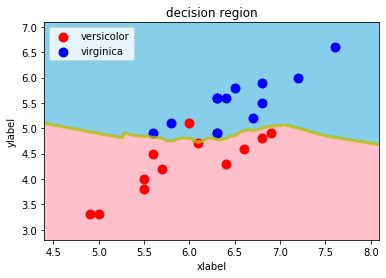

In [196]:
#最近傍法
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(x_train, y_train)
knn3_pred = knn3.predict(x_test)
decision_region(x_test, y_test, knn3)
knn3_eval = eval_df(y_test, knn3_pred, "KNeighbors")

C:\Users\syous\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


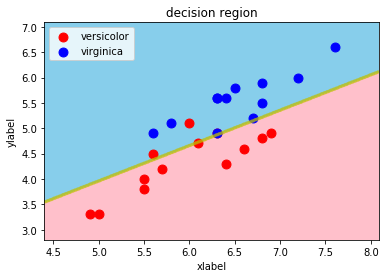

In [197]:
#ロジスティック回帰
lr2 = LogisticRegression()
lr2.fit(x_train, y_train)
lr2_pred = lr2.predict(x_test)
decision_region(x_test, y_test, lr2)
lr2_eval = eval_df(y_test, lr2_pred, "LogisticRegression")

C:\Users\syous\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


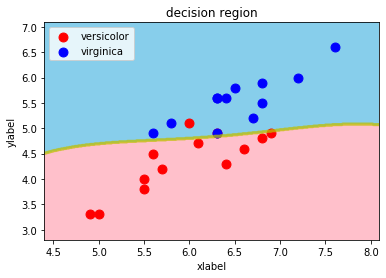

In [198]:
#SVM
svc2 = SVC()
svc2.fit(x_train, y_train)
svc2_pred = svc2.predict(x_test)
decision_region(x_test, y_test, svc2)
svc2_eval = eval_df(y_test, svc2_pred, "SVM")

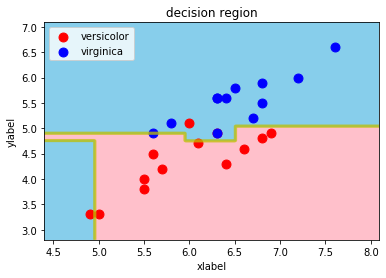

In [199]:
#決定木
tree2 = DecisionTreeClassifier()
tree2.fit(x_train, y_train)
tree2_pred = tree2.predict(x_test)
decision_region(x_test, y_test, tree2)
tree2_eval = eval_df(y_test, tree2_pred, "DecisionTree")

C:\Users\syous\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


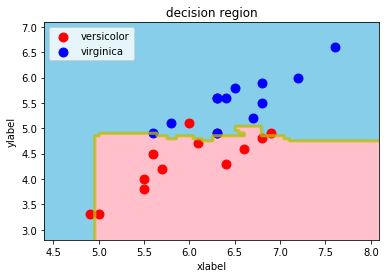

In [200]:
#ランダムフォレスト
random_cf2 = RandomForestClassifier()
random_cf2.fit(x_train, y_train)
random_cf2_pred = random_cf2.predict(x_test)
decision_region(x_test, y_test, random_cf2)
random_cf2_eval = eval_df(y_test, random_cf2_pred, "RandomForest")

In [201]:
#評価指標を並べたｄｆを作成
df_eval2 = pd.concat([knn3_eval, lr2_eval, svc2_eval, tree2_eval, random_cf2_eval])
display(df_eval)
print("="*60)
display(df_eval2)

,accuracy,precision,recall,F
KNeighbors,0.92,1.0,0.846154,0.916667
LogisticRegression,0.92,1.0,0.846154,0.916667
SVM,0.92,1.0,0.846154,0.916667
DecisionTree,0.88,1.0,0.769231,0.869565
RandomForest,0.88,1.0,0.769231,0.869565


,accuracy,precision,recall,F
KNeighbors,0.92,1.000000,0.846154,0.916667
LogisticRegression,0.88,1.000000,0.769231,0.869565
SVM,0.92,1.000000,0.846154,0.916667
DecisionTree,0.84,0.909091,0.769231,0.833333
RandomForest,0.80,0.900000,0.692308,0.782609


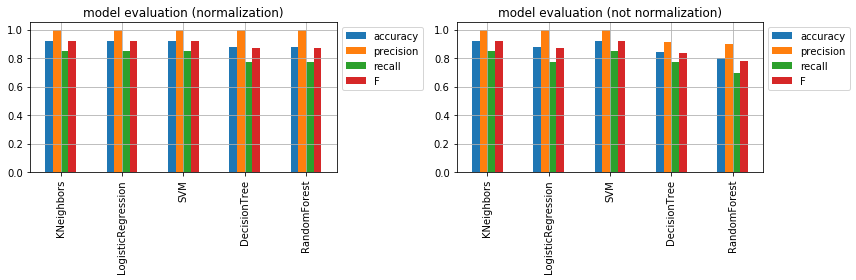

In [233]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))

df_eval.plot.bar(ax=ax1)
ax1.set_title("model evaluation (normalization)")
ax1.grid()
ax1.legend(loc="best", bbox_to_anchor=(1,1))

df_eval2.plot.bar(ax=ax2)
ax2.set_title("model evaluation (not normalization)")
ax2.grid()
ax2.legend(loc="upper left", bbox_to_anchor=(1,1))

plt.tight_layout()
plt.show()

**考察**  
標準化を行ったモデルとそうでないモデルの評価指標値を比較すると、標準化を行ったモデルの方が精度の高いモデルとなった。  
理由は標準化を行うことで扱う説明変数のスケールを揃えることができ、スケールの違いによる学習への影響の偏りを無くすことができるため。  
また、スケールが小さくなることにより、学習速度を上げるメリットもある。

* 勾配降下法によるパラメータ更新幅にデータスケールが影響する

**標準化をつかう場面**
- ロジスティック回帰、ＳＶＭ、ＮＮなど勾配法を用いたモデル
- kNN、K-meansなどの距離を用いるモデル

**標準化を使わない場面**
- 決定木、ランダムフォレスト  
理由は決定木をベースとしたモデルは「特徴量の大小関係のみに注目しており、値自体に意味がないから」である

## 【問題10】（アドバンス課題）全ての目的変数を使用して精度が高い手法
ここまではアヤメの種類を減らし2値分類を行ってきましたが、3種類全てを使った多値分類を行います。

学習と推定、評価を行って、最も精度の高い手法を探してください。

In [249]:
#データセット準備
from sklearn.datasets import load_iris
iris_dataset = load_iris()

X = pd.DataFrame(iris_dataset.data, columns = iris_dataset.feature_names)
y = pd.DataFrame(iris_dataset.target, columns=["target"])

#列名の「cm」をカット
cols = {x:x.replace(" (cm)", "") for x in X.columns}
X = X.rename(columns=cols)

#練習用に特徴量とカテゴリを選択
X = X[["sepal length", "petal length"]]

In [273]:
#訓練データと検証データを分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train, X_test, y_train, y_test = map(np.array, (X_train, X_test, y_train, y_test))
y_train = y_train.flatten()
y_test = y_test.flatten()

In [316]:
#標準化
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [323]:
#決定領域の可視化する関数を作成
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['setosa', 'versicolor', 'virginica']):
    """
    3値分類を3次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ["green", 'red', 'blue']
    contourf_color = ["yellow", 'pink', 'skyblue']
    n_class = 3
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

最近傍法

In [324]:
#モデルの作成と学習⇒予測
knc = KNeighborsClassifier(n_neighbors=5)
knc.fit(X_train, y_train)
knc_pred = knc.predict(X_test)

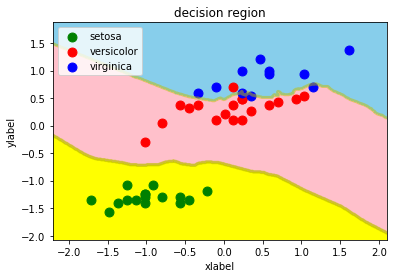

In [325]:
decision_region(X_test, y_test, knc)

In [349]:
from sklearn.metrics import precision_recall_fscore_support
knc_df = pd.DataFrame(precision_recall_fscore_support(y_test, knc_pred, average="micro"),
             index=["precicion", "recall", "F", "suport"],
             columns=["KNeighbors"]).T
knc_df

,precicion,recall,F,suport
KNeighbors,0.933333,0.933333,0.933333,NaN


ロジスティック回帰

In [350]:
lr3 = LogisticRegression()
lr3.fit(X_train, y_train)
lr3_pred = lr3.predict(X_test)

C:\Users\syous\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\syous\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


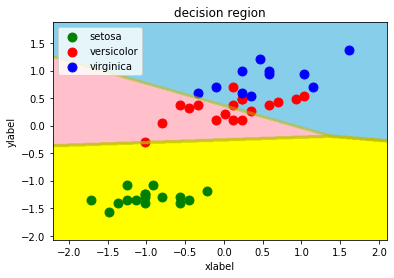

In [351]:
decision_region(X_test, y_test, lr3)

In [352]:
lr3_df = pd.DataFrame(precision_recall_fscore_support(y_test, lr3_pred, average="micro"),
             index=["precicion", "recall", "F", "suport"],
             columns=["LogisticRegression"]).T
lr3_df

,precicion,recall,F,suport
LogisticRegression,0.8,0.8,0.8,NaN


SVM

In [353]:
svc3 = SVC()
svc3.fit(X_train, y_train)
svc3_pred = svc3.predict(X_test)

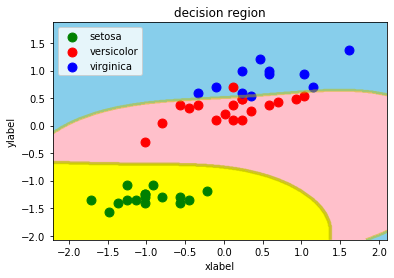

In [354]:
decision_region(X_test, y_test, svc3)

In [360]:
svc3_df = pd.DataFrame(precision_recall_fscore_support(y_test, svc3_pred, average="micro"),
             index=["precicion", "recall", "F", "suport"],
             columns=["SVC"]).T
svc3_df

,precicion,recall,F,suport
SVC,0.977778,0.977778,0.977778,NaN


決定木

In [356]:
tree3 = DecisionTreeClassifier()
tree3.fit(X_train, y_train)
tree3_pred = tree3.predict(X_test)

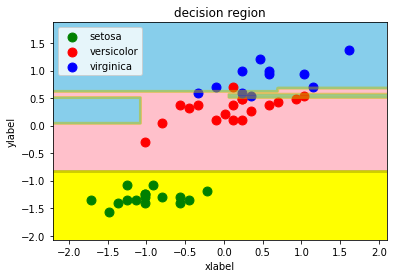

In [357]:
decision_region(X_test, y_test, tree3)

In [359]:
tree3_df =  pd.DataFrame(precision_recall_fscore_support(y_test, tree3_pred, average="micro"),
             index=["precicion", "recall", "F", "suport"],
             columns=["DecisionTree"]).T
tree3_df

,precicion,recall,F,suport
DecisionTree,0.911111,0.911111,0.911111,NaN


ランダムフォレスト

In [362]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

C:\Users\syous\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


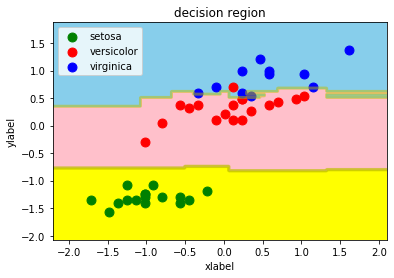

In [363]:
decision_region(X_test, y_test, rfc)

In [365]:
rfc_df = pd.DataFrame(precision_recall_fscore_support(y_test, rfc_pred, average="micro"),
             index=["precicion", "recall", "F", "suport"],
             columns=["RandomForest"]).T
rfc_df

,precicion,recall,F,suport
RandomForest,0.977778,0.977778,0.977778,NaN


まとめ

In [366]:
eval_table = pd.concat([knc_df, lr3_df, svc3_df, tree3_df, rfc_df])
eval_table

,precicion,recall,F,suport
KNeighbors,0.933333,0.933333,0.933333,NaN
LogisticRegression,0.800000,0.800000,0.800000,NaN
SVC,0.977778,0.977778,0.977778,NaN
DecisionTree,0.911111,0.911111,0.911111,NaN
RandomForest,0.977778,0.977778,0.977778,NaN


最も精度が高い手法はSVCとRandomForest